<a href="https://colab.research.google.com/github/KChittaranjan/airbnb-data-analysis/blob/main/AirBnB_Capstone_Project_Chittaranjan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
file_path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 1/Week 4/Capstone Project/Airbnb NYC 2019.csv'

df = pd.read_csv(file_path)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

The only column with inopropriate data type is date remaining all are fine

In [105]:
#parsing the last review from object to date
df['last_review'] = pd.to_datetime(df['last_review'])

In [106]:
#checking the data type
type(df['last_review'][0])

pandas._libs.tslibs.timestamps.Timestamp

Next, columns with heighest null values are last review and number of reviews....we'll examin the other columns there

In [107]:
df[df['last_review'].isna()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365


From examination we can see these are null when number of reviews are zero so we'll replace them with appropriate value
 

In [108]:
#filling null value as 0 as there are no reviews for that row 
df['reviews_per_month'].fillna(0,inplace = True)

In [109]:
#filling null value as the minimum date that's there in the entire dataframe 
df['last_review'].fillna(df['last_review'].min(),inplace = True)

In [110]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Name and host name are having some null values

In [111]:
#we'll update those null values as empty as those are names and we are not using them in the data analysis

In [112]:
df.fillna('empty')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2011-03-28,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2011-03-28,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2011-03-28,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2011-03-28,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2011-03-28,0.00,6,2


Cleaning the numerical column data

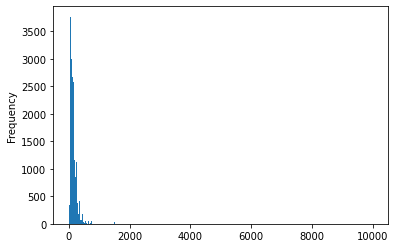

In [113]:
df['price'].plot.hist(bins=1000) 

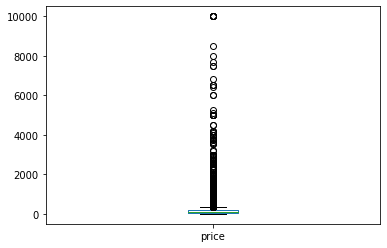

In [114]:
df['price'].plot(kind='box')

In [ ]:
#As there are lot of outliers we'll consider only those which are below 2000

In [115]:
df = df[df['price'] < 2000]

We'll completely remove the outliers when we are doing analysis if it's required

In [85]:
#df = df[(df['price'] < df['price'].quantile(0.75)) & (df['price'] > df['price'].quantile(0.25))]

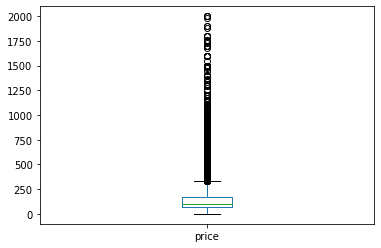

In [116]:
df['price'].plot(kind='box')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48785 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48785 non-null  int64         
 1   name                            48769 non-null  object        
 2   host_id                         48785 non-null  int64         
 3   host_name                       48764 non-null  object        
 4   neighbourhood_group             48785 non-null  object        
 5   neighbourhood                   48785 non-null  object        
 6   latitude                        48785 non-null  float64       
 7   longitude                       48785 non-null  float64       
 8   room_type                       48785 non-null  object        
 9   price                           48785 non-null  int64         
 10  minimum_nights                  48785 non-null  int64         
 11  nu

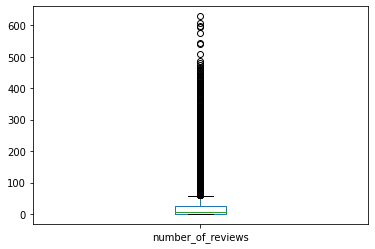

In [118]:
df['number_of_reviews'].plot(kind = 'box')


Number of reviews can be like this

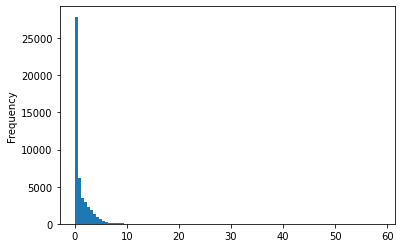

In [53]:
df['reviews_per_month'].plot.hist(bins=100) 


In [59]:
df['minimum_nights'].mean()

7.029962163820431

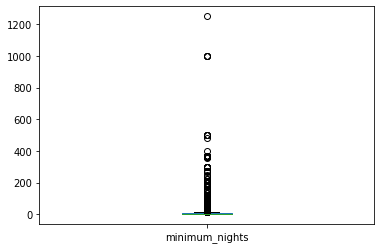

In [58]:
df['minimum_nights'].plot(kind='box')

In [ ]:
#we'll check if these are aggregated per host id

In [126]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [132]:
df[df['minimum_nights'] > 1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


In [133]:
df[df['id']==4204302]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


So no these are not aggregated and we will remove the outliers

In [134]:
df = df[(df['minimum_nights'] < df['minimum_nights'].quantile(0.75)) & (df['minimum_nights'] > df['minimum_nights'].quantile(0.25))]

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22982 entries, 2 to 48891
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              22982 non-null  int64         
 1   name                            22977 non-null  object        
 2   host_id                         22982 non-null  int64         
 3   host_name                       22976 non-null  object        
 4   neighbourhood_group             22982 non-null  object        
 5   neighbourhood                   22982 non-null  object        
 6   latitude                        22982 non-null  float64       
 7   longitude                       22982 non-null  float64       
 8   room_type                       22982 non-null  object        
 9   price                           22982 non-null  int64         
 10  minimum_nights                  22982 non-null  int64         
 11  nu

We'll completely remove the outliers in minimum nights required as these are unrealistic

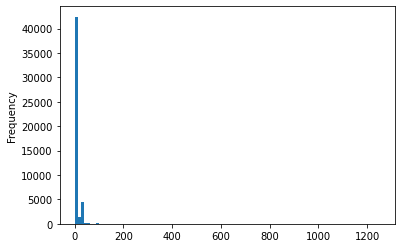

In [54]:
df['minimum_nights'].plot.hist(bins=100) 


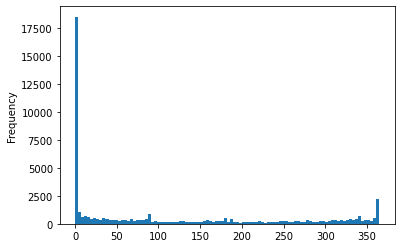

In [55]:
df['availability_365'].plot.hist(bins=100) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

AttributeError: ignored

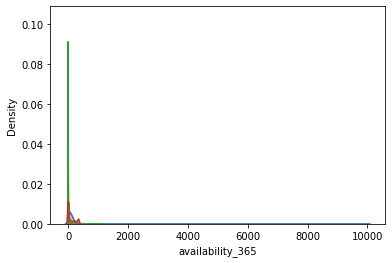

In [43]:
sns.distplot(df['price'], hist=True,bins=100)
sns.distplot(df['number_of_reviews'], hist=True,bins=100)
sns.distplot(df['minimum_nights'], hist=True,bins=100)
sns.distplot(df['availability_365'], hist=True,bins=100)
sns.subplots(False)


In [214]:
5207+26155


31362

In [223]:
df = df[df['availability_365'] != 0 ]

In [208]:
#

df.loc[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [166]:
#correcting the prices with 0 values to median values
#update the price values based on categorical (subgroup)
df.loc[df['price'] == 0,'price'] = df.loc[df['price'] != 0,'price'].median()

In [167]:
df.loc[df['price'] == 0,'price']

Series([], Name: price, dtype: int64)

In [168]:
neighbourhood_group_df = df.groupby('neighbourhood_group')['price'].mean().reset_index()

In [169]:
neighbourhood_group_df['number_of_reviews'] = (df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index())['number_of_reviews']

In [170]:
neighbourhood_group_df['number_of_listings'] = (df.groupby('neighbourhood_group')['id'].count().reset_index())['id']

In [171]:
neighbourhood_group_df['standard_deviation'] = (df.groupby('neighbourhood_group')['price'].std().reset_index())['price']

In [172]:
neighbourhood_group_df['last_review'] = (df.groupby('neighbourhood_group')['last_review'].max().reset_index())['last_review']

In [173]:
neighbourhood_group_df['number_of_hosts'] = (df.groupby('neighbourhood_group')['host_id'].count().reset_index())['host_id']

In [174]:
neighbourhood_group_df.drop('number_of_hosts',axis = 1)

,neighbourhood_group,price,number_of_reviews,number_of_listings,standard_deviation,last_review
0,Bronx,89.130197,26582,914,112.617584,2019-07-07
1,Brooklyn,132.916313,425357,12260,188.984983,2019-07-08
2,Manhattan,214.202080,392267,13559,325.029426,2019-07-08
3,Queens,100.029781,143883,4298,108.584467,2019-07-08
4,Staten Island,114.229607,10865,331,291.526508,2019-07-08


Text(0.5, 0, 'Neighbourhood`')

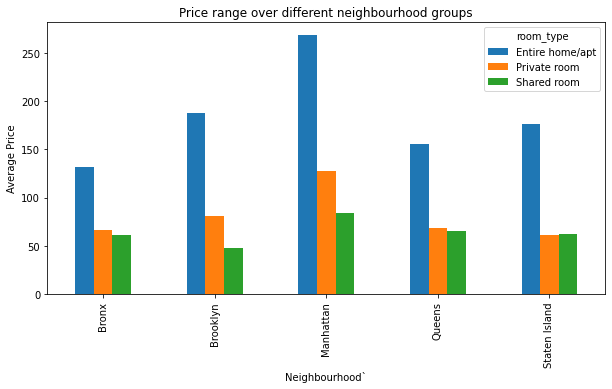

In [175]:
plt.rcParams['figure.figsize'] = (10, 5)
df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack().plot(kind="bar")
plt.title('Price range over different neighbourhood groups')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood`')

In [176]:
host_df = df.groupby('host_id')['id'].count().reset_index().sort_values('id',ascending = False)

In [177]:
host_df

,host_id,id
19267,219517861,327
15504,107434423,232
10412,30283594,121
7164,12243051,96
16600,137358866,92
...,...,...
7897,16030422,1
7895,16024560,1
7894,16015663,1
7893,16006197,1


In [178]:
def get_neighbourhood(row):
  li = []
  for area in df.loc[row == df['host_id'],'neighbourhood_group']:
    li.append(area)
  return list(set(li))

In [179]:
host_df['neighbourhood'] = host_df['host_id'].apply(lambda row: get_neighbourhood(row))

In [180]:
host_df['avg_number_of_days'] = host_df['host_id'].apply(lambda row: df.loc[df['host_id']==row,'availability_365'].mean())

In [181]:
host_df

,host_id,id,neighbourhood,avg_number_of_days
19267,219517861,327,[Manhattan],301.492355
15504,107434423,232,"[Manhattan, Brooklyn]",253.810345
10412,30283594,121,[Manhattan],313.421488
7164,12243051,96,[Manhattan],276.614583
16600,137358866,92,"[Manhattan, Brooklyn, Queens]",219.967391
...,...,...,...,...
7897,16030422,1,[Manhattan],18.000000
7895,16024560,1,[Brooklyn],165.000000
7894,16015663,1,[Queens],88.000000
7893,16006197,1,[Brooklyn],86.000000


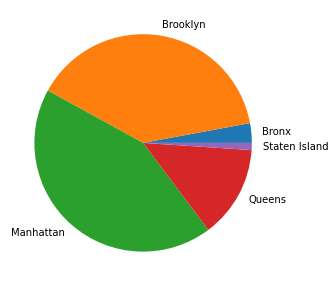

In [182]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.pie(neighbourhood_group_df['number_of_listings'], labels = neighbourhood_group_df['neighbourhood_group'])
plt.show() 

neighbourhood_group
Bronx            AxesSubplot(0.125,0.125;0.775x0.755)
Brooklyn         AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan        AxesSubplot(0.125,0.125;0.775x0.755)
Queens           AxesSubplot(0.125,0.125;0.775x0.755)
Staten Island    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

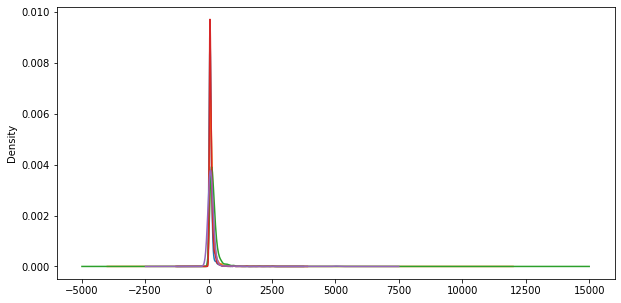

In [185]:
df.groupby('neighbourhood_group').price.plot(kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


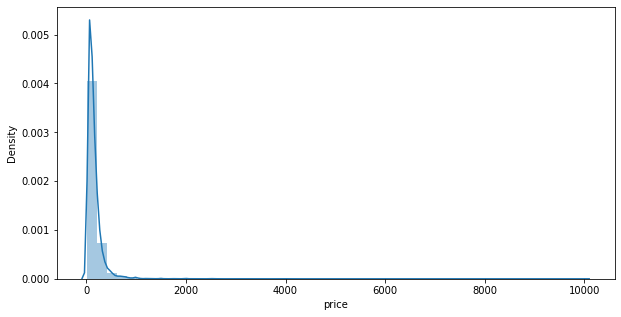

In [186]:
sns.distplot(df['price'], hist=True)

In [85]:
plt.rcParams['figure.figsize'] = (10, 5)


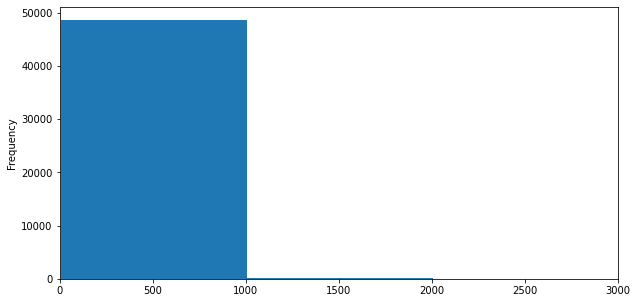

In [90]:
df['price'].plot.hist(xlim=(0,3000)) 


([<matplotlib.axis.XTick at 0x7ff7819af0d0>,
 <a list of 20 Text major ticklabel objects>)

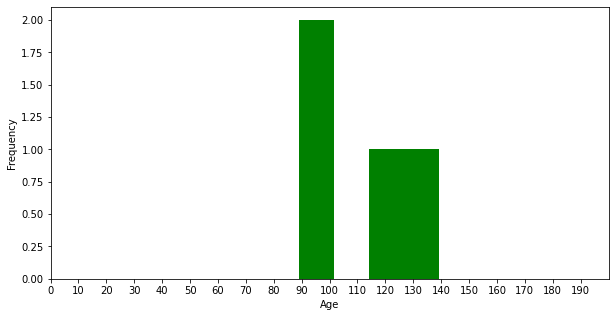

In [187]:
plt.hist(neighbourhood_group_df['price'], color='green')
plt.xlim(0,200)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.xticks(np.arange(0, 200, 10))

In [189]:
corr1 = neighbourhood_group_df['number_of_listings'].corr(neighbourhood_group_df['standard_deviation'],method='pearson')
print(corr1)

0.3793623754913061


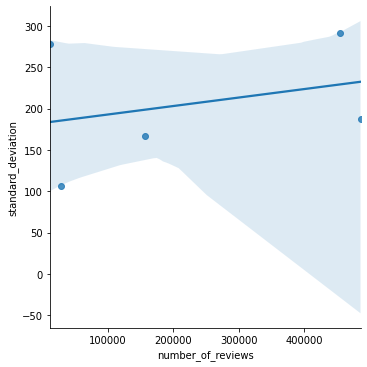

In [78]:
sns.lmplot(x='number_of_reviews', y='standard_deviation', data= neighbourhood_group_df )

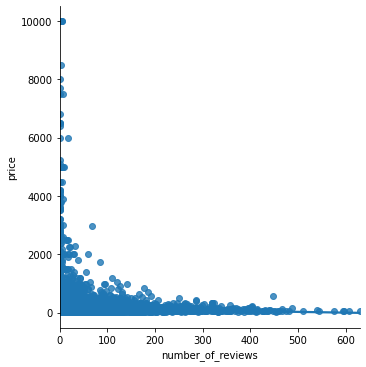

In [123]:
sns.lmplot(x='number_of_reviews', y='price', data= df )

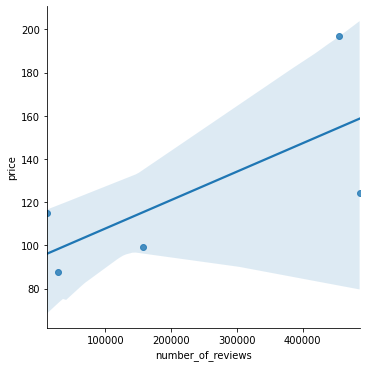

In [125]:
sns.lmplot(x='number_of_reviews', y='price', data= neighbourhood_group_df )

In [118]:
correlation_price_reviews = df.loc[:,['price','number_of_reviews']]

In [119]:
correlation_price_reviews.corr()

,price,number_of_reviews
price,1.000000,-0.047932
number_of_reviews,-0.047932,1.000000


In [196]:
neighbourhood_df = df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [197]:
neighbourhood_df['number_of_listings'] = (df.groupby(['neighbourhood_group','neighbourhood'])['id'].count().reset_index())['id']

In [198]:
neighbourhood_df['number_of_reviews'] = (df.groupby(['neighbourhood_group','neighbourhood'])['number_of_reviews'].sum().reset_index())['number_of_reviews']

In [199]:
neighbourhood_df['standard_deviation'] = (df.groupby(['neighbourhood_group','neighbourhood'])['price'].std().reset_index())['price']

In [200]:
neighbourhood_df

,neighbourhood_group,neighbourhood,price,number_of_listings,number_of_reviews,standard_deviation
0,Bronx,Allerton,91.702703,37,1752,76.842142
1,Bronx,Baychester,78.000000,6,310,17.561321
2,Bronx,Belmont,85.823529,17,275,77.808447
3,Bronx,Bronxdale,54.923077,13,318,18.481800
4,Bronx,Castle Hill,63.000000,9,118,33.462666
...,...,...,...,...,...,...
213,Staten Island,Tompkinsville,77.567568,37,2197,46.831578
214,Staten Island,Tottenville,144.857143,7,139,98.311458
215,Staten Island,West Brighton,80.555556,18,656,47.689217
216,Staten Island,Westerleigh,71.500000,2,18,44.547727


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


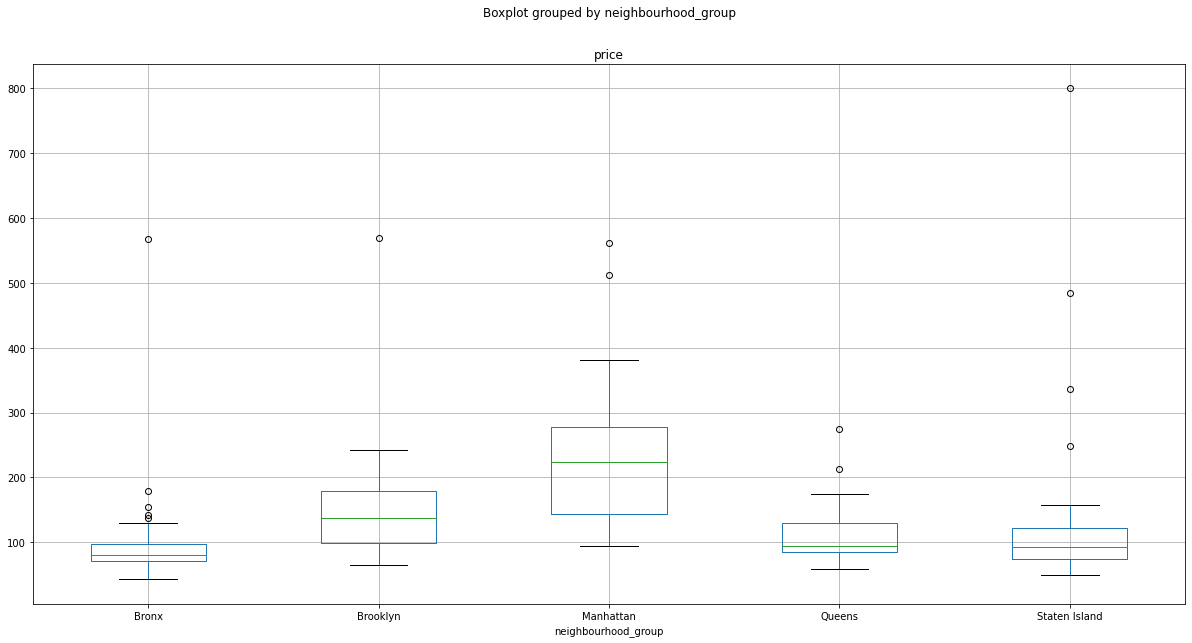

In [204]:
plt.rcParams['figure.figsize'] = (20, 10)
neighbourhood_df.boxplot(by = 'neighbourhood_group' , column='price')

In [122]:
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
plt.plot()


In [ ]:
plt.plot()

plt.title('Monthly Sales in the year 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Month')

In [ ]:
room_type_df = df.groupby('room_type')['price'].mean()

In [ ]:
room_type_df

room_type
Entire home/apt    211.802590
Private room        89.814208
Shared room         70.310345
Name: price, dtype: float64

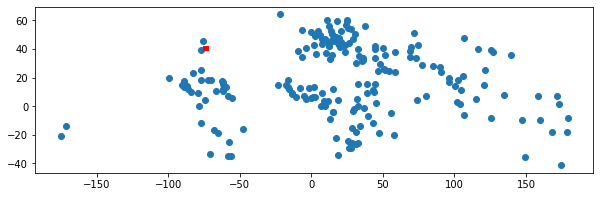

In [ ]:


geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);